In [1]:
import h5py
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
def load_file(filename: str) -> tuple[np.ndarray, np.ndarray]:
    """Load in the phase and fluorescent data from a file."""
    with h5py.File(filename, "r") as f:
        phase = f["Efield_phase"][:]
        fluorescent = f["Fluo"][:]
    
    return phase, fluorescent

def load_directory(dir: str = "data/") -> tuple[np.ndarray, np.ndarray]:
    """Load in all the files in a directory."""
    all_phase = []
    all_fluorescent = []
    
    for filename in os.listdir(dir):
        if filename.endswith(".mat"):
            phase, fluorescent = load_file(os.path.join(dir, filename))
            all_phase.append(phase)
            all_fluorescent.append(fluorescent)
    
    return np.concatenate(all_phase), np.concatenate(all_fluorescent)


phase, fluorescent = load_directory()

phase.shape, fluorescent.shape

((40, 1036, 1036), (40, 2200, 2200))

In [3]:
# Remove images where the phase wasn't captured correctly
images_to_remove = [14, 15, 18, 21, 22, 23, 24, 25, 26]

phase = np.delete(phase, images_to_remove, axis=0)
fluorescent = np.delete(fluorescent, images_to_remove, axis=0)

phase.shape, fluorescent.shape

((31, 1036, 1036), (31, 2200, 2200))

In [4]:
# Resize the images to the same size
output_shape = (1024, 1024)

phase = np.array([resize(img, output_shape) for img in phase])
fluorescent = np.array([resize(img, output_shape) for img in fluorescent])

phase.shape, fluorescent.shape

((31, 1024, 1024), (31, 1024, 1024))

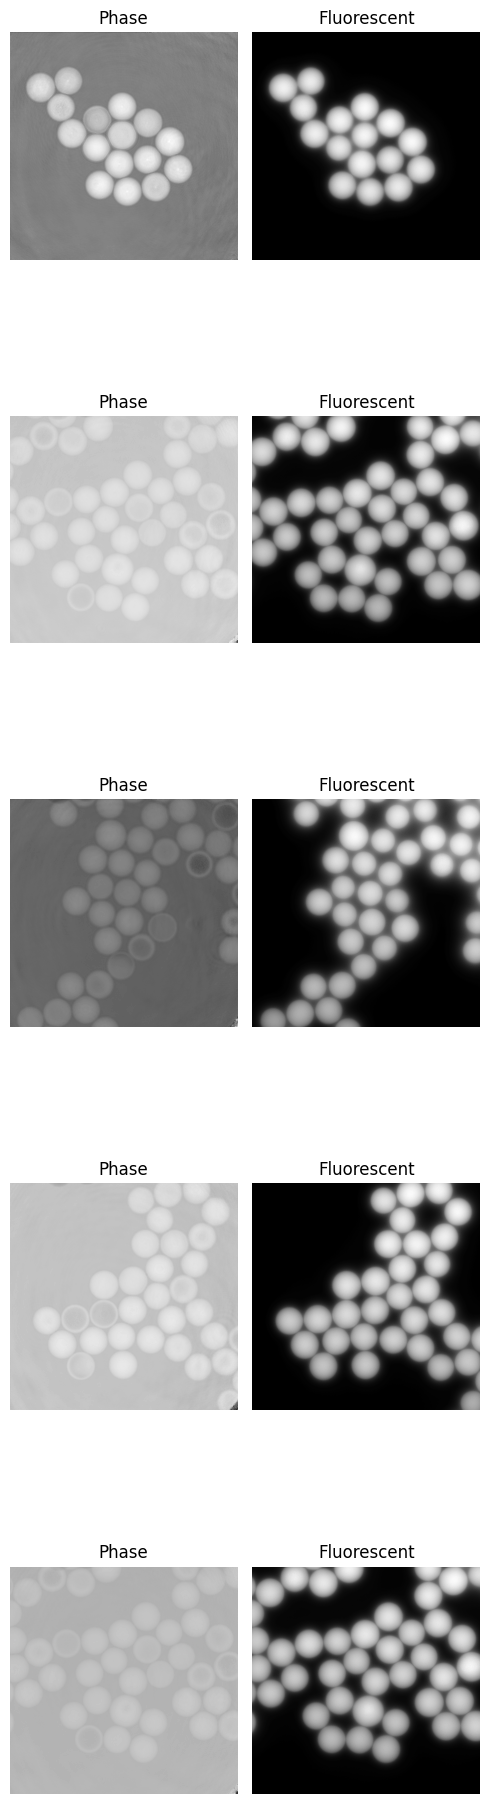

In [20]:
# Lets take a final look at our data
num_images = 5

# Get random indices for the images
random_indices = random.sample(range(len(fluorescent)), num_images)

# Display the images
fig, axes = plt.subplots(num_images, 2, figsize=(5, 20))

for i, idx in enumerate(random_indices):
    axes[i, 0].imshow(phase[idx], cmap="gray")
    axes[i, 0].set_title("Phase")
    axes[i, 0].axis("off")
    
    axes[i, 1].imshow(fluorescent[idx], cmap="gray")
    axes[i, 1].set_title("Fluorescent")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


In [15]:
# Write the data to a new file
def write_data(phase: np.ndarray, fluorescent: np.ndarray, output_dir: str = "data/"):
    """Write the phase and fluorescent data to a new file."""
    os.makedirs(output_dir, exist_ok=True)


    
    with h5py.File(os.path.join(output_dir, "microspheres.h5"), "w") as f:
        f.create_dataset("phase", data=phase)
        f.create_dataset("fluorescent", data=fluorescent)

write_data(phase, fluorescent)